<font size="5">Initial Exploratory Data Analysis (EDA) of Domestic Consumption Coffee Data</font><br /><br />
The data was collected from the official International Coffee Organization website: https://www.ico.org/new_historical.asp.<br /> <br />

In [49]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Display all columns in dataframes
pd.set_option('display.max_columns', None)


In [50]:
# Load dataset into dataframe

coffee_domestic_consumption_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_domestic_consumption.csv")


<font size="5">Domestic Consumption:</font><br /> <br />
In this analysis, domestic consumption references the amount of coffee in grams that are bought and used in the same country that grew it.

In [51]:
# Lets take a small look at each dataframe

coffee_domestic_consumption_0.head(2)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,1800000,1200000,1200000,1200000,1200000,900000,900000,900000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,1980000,2040000,2100000,2190000,2250000,2310000,2700000,2460000,2520000,2610000,2700000,2760000,2850000,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000


In [52]:
# Lets get some basic information about each dataframe

coffee_domestic_consumption_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

In [53]:
# Descriptive Statistics

coffee_domestic_consumption_0['Total_domestic_consumption'].describe()

count    5.500000e+01
mean     1.112487e+09
std      3.834783e+09
min      0.000000e+00
25%      9.586920e+06
50%      1.216200e+08
75%      5.897930e+08
max      2.782470e+10
Name: Total_domestic_consumption, dtype: float64

In [54]:
# Standardize columns names for ease of use; snake_case

coffee_domestic_consumption_0.columns
coffee_domestic_consumption_0 = coffee_domestic_consumption_0.rename(columns = {'Country': 'country', 
                                'Coffee type': 'coffee_type', 'Total_domestic_consumption': 'total_domestic_consumption'})
coffee_domestic_consumption_0.columns

Index(['country', 'coffee_type', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', 'total_domestic_consumption'],
      dtype='object')

In [55]:
# Check for missing values

coffee_domestic_consumption_0.isna().sum()

country                       0
coffee_type                   0
1990/91                       0
1991/92                       0
1992/93                       0
1993/94                       0
1994/95                       0
1995/96                       0
1996/97                       0
1997/98                       0
1998/99                       0
1999/00                       0
2000/01                       0
2001/02                       0
2002/03                       0
2003/04                       0
2004/05                       0
2005/06                       0
2006/07                       0
2007/08                       0
2008/09                       0
2009/10                       0
2010/11                       0
2011/12                       0
2012/13                       0
2013/14                       0
2014/15                       0
2015/16                       0
2016/17                       0
2017/18                       0
2018/19                       0
2019/20 

In [56]:
# Check for duplicates

coffee_domestic_consumption_0.duplicated().sum()

0

<font size="5">Outliers:</font> <br /> <br />

I am demonstrating how to check for outliers but in this analysis this step is not needed. <br/>

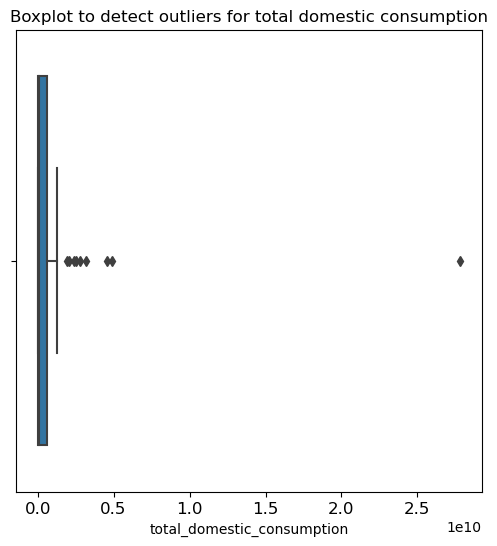

In [57]:
# Lets check for outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for total domestic consumption', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=coffee_domestic_consumption_0['total_domestic_consumption'])
plt.show()

In [58]:
# Identify subset of data containing outliers

percentile_25 = coffee_domestic_consumption_0['total_domestic_consumption'].quantile(0.25)
percentile_75 = coffee_domestic_consumption_0['total_domestic_consumption'].quantile(0.75)

# Compute Interquartile Range

iqr = percentile_75 - percentile_25

# Define upper and lower limits for non-outlier values

upper_lim = percentile_75 + 1.5*iqr
lower_lim = percentile_25 + 1.5*iqr
print("Lower limit:", lower_lim)
print("Upper limit:", upper_lim)

# Identify outlier subset

outliers = coffee_domestic_consumption_0[(coffee_domestic_consumption_0['total_domestic_consumption'] > upper_lim) | (coffee_domestic_consumption_0['total_domestic_consumption'] < lower_lim)]

print("Number of rows in the dataframe containing outliers in total_domestic_consumption: ", len(outliers))


Lower limit: 879896010.0
Upper limit: 1460102070.0
Number of rows in the dataframe containing outliers in total_domestic_consumption:  54


In [59]:
# Look at countries with most domestic consumption

top_dom_consumption_countries = coffee_domestic_consumption_0[['country', 'total_domestic_consumption']]
top_dom_consumption_countries = top_dom_consumption_countries.sort_values(by='total_domestic_consumption', ascending=False).head(10)


In [60]:
# Lets graph the countries with the most domestic consumption

fig1 = px.bar(top_dom_consumption_countries, x = 'country', y = 'total_domestic_consumption', color = 'country',
                color_discrete_sequence = px.colors.qualitative.Safe, labels = {"country": "Country",
                "total_domestic_consumption": "Total Domestic Consumption"},
                title="Top 10 Domestic Consumers of Coffee by Country", width=800, height=600)

fig1.update_layout(title_x=0.5)
fig1.show()

In [61]:
# Lets inspect coffee type

dom_con_coffee_type = coffee_domestic_consumption_0['coffee_type'].value_counts()
dom_con_coffee_type


Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: coffee_type, dtype: int64

In [62]:
# Lets graph top consumers by coffee type
top_dom_con_by_coffee_type = coffee_domestic_consumption_0[['country', 'total_domestic_consumption', 'coffee_type']]
top_dom_con_by_coffee_type = top_dom_con_by_coffee_type.sort_values(by=['total_domestic_consumption'], ascending = False)
top_dom_con_by_coffee_type = top_dom_con_by_coffee_type.head(20)

fig2 = px.bar(top_dom_con_by_coffee_type, x = 'country', y = 'total_domestic_consumption', color = 'coffee_type',
                color_discrete_sequence = px.colors.qualitative.Safe, labels = {"country": "Country",
                "total_domestic_consumption": "Total Domestic Consumption"},
                title="Top 20 Domestic Consumers of Coffee by Coffee Type", width=1000, height=600)

fig2.update_layout(title_x=0.5)
fig2.show()




In [63]:
coffee_domestic_consumption_1 = coffee_domestic_consumption_0[['country', 'total_domestic_consumption']].sort_values(by=['total_domestic_consumption'], ascending=False).head(10)
coffee_domestic_consumption_2 = coffee_domestic_consumption_0[coffee_domestic_consumption_0.country.isin(top_consumption1['country'].unique())]

coffee_domestic_consumption_2 = coffee_domestic_consumption_2.T
coffee_domestic_consumption_2.drop(['country', 'total_domestic_consumption', 'coffee_type'], axis=0, inplace=True)
coffee_domestic_consumption_2.index.name = 'Year'
coffee_domestic_consumption_2.columns = coffee_domestic_consumption_1['country'].values
coffee_domestic_consumption_2

,Brazil,Indonesia,Ethiopia,Mexico,Philippines,Colombia,Venezuela,India,Viet Nam,Thailand
Year,,,,,,,,,,
1990/91,492000000,74520000,43200000,74100000,72000000,54180000,82440000,11280000,46943400,9000000
1991/92,510000000,76800000,45000000,76140000,75840000,55000020,72000000,13200000,48928800,13800000
1992/93,534000000,79140000,45000000,78180000,79860000,55020000,78000000,13980000,50998200,15000000
1993/94,546000000,81540000,46200000,80340000,84120000,49999980,64200000,15000000,53155800,16020000
1994/95,558000000,84000000,47400000,82500000,88560000,50100000,61200000,16980000,55404000,16020000
1995/96,606000000,86580000,48600000,81540000,93300000,50220000,70740000,25020000,57747600,16910700
1996/97,660000000,89160000,49860000,80580000,98220000,50280000,74100000,19980000,60190800,17850960
1997/98,690000000,91920000,51180000,79680000,103440000,50340000,72060000,23400000,62736599,18843480
1998/99,732000000,94680000,48600000,78720000,108960000,54000000,66480000,25980000,65390400,19891140


In [64]:
# Lets graph a time series of domestic consumption by country

fig3 = px.line(coffee_domestic_consumption_2, x = coffee_domestic_consumption_2.index,
               y = coffee_domestic_consumption_2.columns[0:],color_discrete_sequence = px.colors.qualitative.Safe,
               labels = {"year": "Year", "value": "Total Domestic Consumption", "variable": "Country"},
               title="Domestic Consumption Rates over Time (Top 10 Countries)", width=1000, height=600)

fig3.update_layout(title_x=0.45)
fig3.show()
